https://github.com/udacity/PyTorchCrashCourse/blob/master/PyTorch-Autoencoder.ipynb

In [1]:
import numpy as np

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
import copy

from tqdm.notebook import tqdm

In [2]:
# helper functions

import matplotlib.pyplot as plt
# import numpy as np
# from torch import nn, optim
# from torch.autograd import Variable
import copy

def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
#     inputs = Variable(images)
#     targets = Variable(images)
    inputs = copy.deepcopy(images)
    targets = copy.deepcopy(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its 
        reconstruction also a PyTorch Tensor 
    '''
    
    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box')
        
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,7), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10).astype(int), size='large');
    ax2.set_title('Digit Probability')
    ax2.set_xlim(0, 1.1)

# Load MNIST data

In [3]:
# define transformation pipeline
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),
                                                     (0.5))])

In [4]:
# download dataset
trainset = datasets.MNIST("data/", download=True, train=True, transform=transform)
testset = datasets.MNIST("data/", download=True, train=False, transform=transform)

In [5]:
# Create dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Building network (for MNIST)

```
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers and operations here

    def encoder(self, x):
        # Forward pass through the encoder
        return x

    def decoder(self, x):
        # Forward pass through the decoder
        return x

    def forward(self, x):

        x = self.encoder(x)
        logits = self.decoder(x)

        return logits
```

In [6]:
class Network(nn.Module):
    
    def __init__(self, drop_prob=0.5):
        super().__init__()
        
        # components needed for Encoder
        self.conv1 = nn.Conv2d(1, 64, 3, stride=2, padding=1) # MNIST 8*8 with 3 RGB channels
        self.conv2 = nn.Conv2d(64, 32, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 16, 3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(16, 8, 3, stride=1, padding=1)
        
        # components needed for Decoder
        self.upconv1 = nn.ConvTranspose2d(8, 8, 3, stride=2, padding=1)
        self.upconv2 = nn.ConvTranspose2d(8, 16, 3, stride=2, padding=1)
        self.upconv3 = nn.ConvTranspose2d(16, 32, 3, stride=1, padding=1)
        self.upconv4 = nn.ConvTranspose2d(32, 64, 3, stride=2, padding=1)
        self.out = nn.ConvTranspose2d(64, 1, 3, stride=1, padding=1)
        
        # dropout
        self.drop = nn.Dropout(p=drop_prob)
    
    def encode(self, x):
        x = self.drop(F.relu(self.conv1(x)))
        x = self.drop(F.relu(self.conv2(x)))
        x = self.drop(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        return x
    
    def decode(self, x):
        x = self.drop(F.relu(self.upconv1(x, output_size=(7, 7))))
        x = self.drop(F.relu(self.upconv2(x, output_size=(14, 14))))
        x = self.drop(F.relu(self.upconv3(x, output_size=(14, 14))))
        x = self.drop(F.relu(self.upconv4(x, output_size=(28, 28))))
        x = self.out(x)
        return x
    
    def forward(self, x):
        x = self.encode(x)
        logits = self.decode(x)
        return logits

In [7]:
net = Network()

In [8]:
test_network(net, trainloader)

True

# Train network

In [9]:
epochs = 10
print_every = 200
show_every = 1000
cuda = False

net = Network(drop_prob=0.0)
if cuda:
    net.cuda()


criterion = nn.MSELoss()
optimizer = optim.Adam(params=net.parameters(),
                       lr=0.001)

Epoch: 1/10.. Loss: 0.2947.. Test loss: 0.1075..
Epoch: 1/10.. Loss: 0.0809.. Test loss: 0.0626..
Epoch: 1/10.. Loss: 0.0534.. Test loss: 0.0445..
Epoch: 1/10.. Loss: 0.0402.. Test loss: 0.0347..



Epoch: 2/10.. Loss: 0.0332.. Test loss: 0.0309..


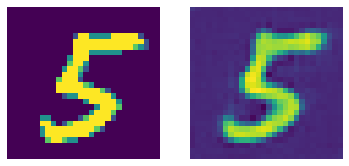

Epoch: 2/10.. Loss: 0.0290.. Test loss: 0.0264..
Epoch: 2/10.. Loss: 0.0262.. Test loss: 0.0244..
Epoch: 2/10.. Loss: 0.0245.. Test loss: 0.0227..
Epoch: 2/10.. Loss: 0.0230.. Test loss: 0.0218..



Epoch: 3/10.. Loss: 0.0216.. Test loss: 0.0204..


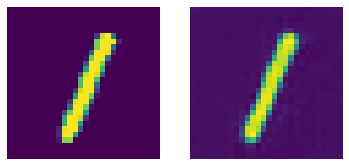

Epoch: 3/10.. Loss: 0.0206.. Test loss: 0.0195..
Epoch: 3/10.. Loss: 0.0199.. Test loss: 0.0186..
Epoch: 3/10.. Loss: 0.0191.. Test loss: 0.0179..
Epoch: 3/10.. Loss: 0.0185.. Test loss: 0.0177..



Epoch: 4/10.. Loss: 0.0180.. Test loss: 0.0171..


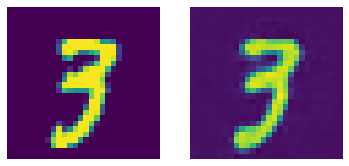

Epoch: 4/10.. Loss: 0.0175.. Test loss: 0.0169..
Epoch: 4/10.. Loss: 0.0171.. Test loss: 0.0161..
Epoch: 4/10.. Loss: 0.0168.. Test loss: 0.0161..



Epoch: 5/10.. Loss: 0.0164.. Test loss: 0.0157..
Epoch: 5/10.. Loss: 0.0160.. Test loss: 0.0168..


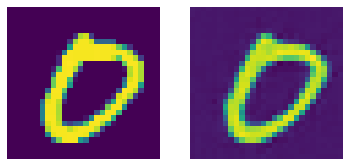

Epoch: 5/10.. Loss: 0.0159.. Test loss: 0.0150..
Epoch: 5/10.. Loss: 0.0152.. Test loss: 0.0146..
Epoch: 5/10.. Loss: 0.0152.. Test loss: 0.0146..



Epoch: 6/10.. Loss: 0.0150.. Test loss: 0.0146..
Epoch: 6/10.. Loss: 0.0149.. Test loss: 0.0139..


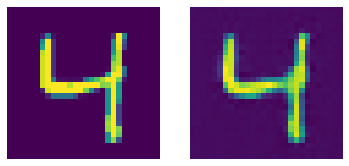

Epoch: 6/10.. Loss: 0.0147.. Test loss: 0.0143..
Epoch: 6/10.. Loss: 0.0143.. Test loss: 0.0142..
Epoch: 6/10.. Loss: 0.0142.. Test loss: 0.0137..



Epoch: 7/10.. Loss: 0.0140.. Test loss: 0.0133..
Epoch: 7/10.. Loss: 0.0140.. Test loss: 0.0132..


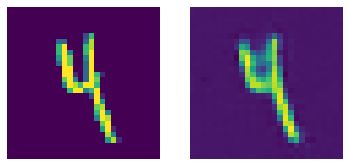

Epoch: 7/10.. Loss: 0.0139.. Test loss: 0.0137..
Epoch: 7/10.. Loss: 0.0135.. Test loss: 0.0129..



Epoch: 8/10.. Loss: 0.0135.. Test loss: 0.0128..
Epoch: 8/10.. Loss: 0.0133.. Test loss: 0.0129..
Epoch: 8/10.. Loss: 0.0132.. Test loss: 0.0126..


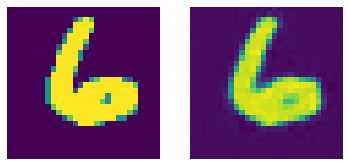

Epoch: 8/10.. Loss: 0.0132.. Test loss: 0.0124..
Epoch: 8/10.. Loss: 0.0130.. Test loss: 0.0126..



Epoch: 9/10.. Loss: 0.0128.. Test loss: 0.0123..
Epoch: 9/10.. Loss: 0.0128.. Test loss: 0.0125..
Epoch: 9/10.. Loss: 0.0126.. Test loss: 0.0123..


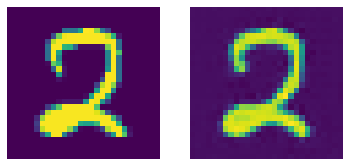

Epoch: 9/10.. Loss: 0.0126.. Test loss: 0.0124..
Epoch: 9/10.. Loss: 0.0126.. Test loss: 0.0122..



Epoch: 10/10.. Loss: 0.0123.. Test loss: 0.0127..
Epoch: 10/10.. Loss: 0.0123.. Test loss: 0.0121..
Epoch: 10/10.. Loss: 0.0123.. Test loss: 0.0119..


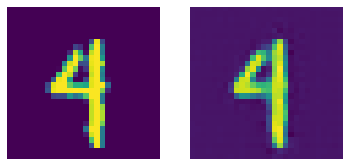

Epoch: 10/10.. Loss: 0.0121.. Test loss: 0.0117..



In [10]:
steps = 0
running_loss = 0

for e in range(epochs):
    for images, labels in tqdm(iter(trainloader)):
        steps += 1
        
        inputs = copy.deepcopy(images)
        targets = copy.deepcopy(images)
        
        if cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
            
        
        # initialize gradient
        optimizer.zero_grad()
        
        outputs = net.forward(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
        if steps % print_every == 0:
            net.eval()
            
            val_loss = 0
            with torch.no_grad():
                for ii, (images, labels) in enumerate(testloader):
                    
                    inputs = copy.deepcopy(images)
                    targets = copy.deepcopy(images)
                    

                    if cuda:
                        inputs, targets = inputs.cuda(), targets.cuda()

                    outputs = net.forward(inputs)
                    val_loss += criterion(outputs, targets).item()
                
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "Test loss: {:.4f}..".format(val_loss/(ii+1)),
                 )
            
            running_loss = 0
            net.train()
            
        if steps % show_every == 0:
            net.cpu()
            net.eval()
            img = images[3]
            with torch.no_grad():
                x = img.resize_(1, *img.size())
                recon = net(x)

                view_recon(img, recon)
                plt.show()
            if cuda:
                net.cuda()
            net.train()

# Encoding image to vector

In [12]:
net.cpu()
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [15]:
img = images[3]
# Need to resize the single image to add a fourth dimension
with torch.no_grad():
    x = img.resize_(1, *img.size())
    comp = net.encode(x)

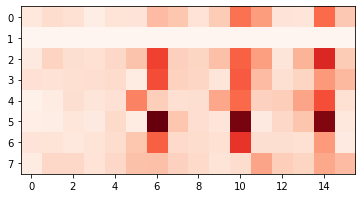

In [16]:
comp_arr = comp.data.numpy().squeeze()
comp_arr = comp_arr.reshape((8, 16))
plt.imshow(comp_arr, cmap='Reds')